# Knockoff-Mixed-Graphical-Model
This is an algorithm for training a graphical model for associations between variables, some of which are qualitative and some quantitative.
The algorithm uses the model-X framework promoted by Candès et al. [https://arxiv.org/abs/1610.02351] which controls the proportion of falsely discovered edges,

$$\mathbb{E} \{ \frac{ | j \in \hat{S} \cap H_0 |}{ | \hat{S} | }\} \leq q $$

## Installation

## Example

#### Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from graphviz import Graph
from KnockoffMixedGraphicalModel import kmgm, isingutils

In [2]:
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin/"

#### Load data

In [3]:
Z = np.array(pd.read_csv("data\\Z.csv")) #discrete subvector
Y = np.array(pd.read_csv("data\\Y.csv")) #continous subvector

### For the sake of visualization, sample knockoffs for the conditional gaussian

#### Estimate coupling and joint coupling matrices

In [5]:
coupling = np.cov(Z.T)
joint_coupling = isingutils.Ising_Data.joint_coupling(Z, Y)

#### Create instance of sampler

In [7]:
conditional_gaussian_knockoff_sampler = kmgm.Ising_Normal_Knockoffs(Z, Y, coupling, joint_coupling)

#### Sample Knockoffs

In [8]:
Z_tilde, Y_tilde = conditional_gaussian_knockoff_sampler.sample_knockoffs(k=2)

#### Visualize results

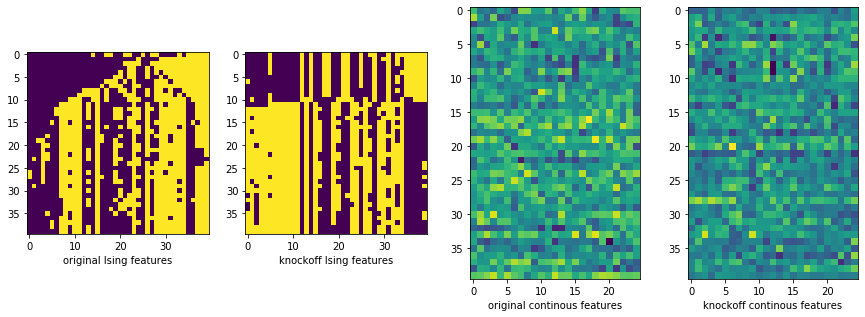

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].imshow(Z)
ax[1].imshow(Z_tilde)
ax[2].imshow(Y)
ax[3].imshow(Y_tilde)
ax[0].set_xlabel("original Ising features")
ax[1].set_xlabel("knockoff Ising features")
ax[2].set_xlabel("original continous features")
ax[3].set_xlabel("knockoff continous features")
plt.show()

### Now, train Knockoff-Mixed-Graphical-Model

#### Create instance of Knockoff Mixed Graphical Model

In [11]:
KMGM = kmgm.Knockoff_Mixed_Graphical_Model()

#### Training with Lasso-coefficient-distance (lcd), $W_i = |\hat{b}_i(\lambda)| - |\hat{b}_{i + n}(\lambda)|$ as feature statistics function

In [12]:
KMGM.fit(Z, Y, k=2, feature_statistics_fnc = "lcd")

#### Merge neighborhoods

In [13]:
KMGM.merge_neighborhoods(th = 0.01)

#### Optional: Visualize Graph

In [14]:
G = Graph(format="png")
z_names = np.array(['z' + str(i + 1) for i in range(Z.shape[1])])
y_names = np.array(['y' + str(i + 1) for i in  range(Y.shape[1])])
names = np.hstack((z_names, y_names))
vertices = KMGM.get_vertices()


for i in range(Z.shape[1]):
    G.node(z_names[i], z_names[i])
for i in range(Y.shape[1]):
    G.node(y_names[i], y_names[i])
    
for i, name in enumerate(names):
    for node in vertices[i]:
        G.edge(name, names[node])
        
G.render("kmgm")

'kmgm.png'

<img src='kmgm.png'>Knockoff Mixed Graphical Model</img>